# Prophet - Predecir el valor de Bitcoin


Prophet es una de las librerías más avanzadas para predecir series temporales desarrollada por Facebook. Te enseñaremos a como entrenar un modelo con Prophet, a optimizarlo y a utilizarlo para realizar predicciones futuras. En este ejercicio vamos a practicar a predecir el valor de Bitcoin, una criptomoneda. Es la criptomoneda que le ha marcado el camino a todas las demás que llegaron después utilizando su tecnología.

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: Para ejecutar el código de Python en la celda de código a continuación, haz clic en la celda para seleccionarla y presiona <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>
<hr/>


In [ ]:
# Instalamos el modelo predictivo Prophet
!python -m pip install prophet --quiet
# De aquí vamos a descargar los datos
!pip install yfinance --quiet

In [ ]:
#Importamos las dependencias
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

<h3 id="version">Cargar histórico de datos</h3>


<p>
    Para descargarnos la serie temporal de BTC lo vamos a hacer desde Yahoo Finance. En concreto vamos a descargar el histórico desde 2016 hasta la actualidad.
</p>



In [ ]:
# Fecha de inicio es un string 2016-01-01 y fecha de fin (hoy) en formato texto '%Y-%m-%d'
today = '2023-10-10'
start_date = '2016-01-01'
# Descargar el dataframe
cc_df = yf.download('CCEP.MC',start_date, today).reset_index()

cc_df.tail()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
1879,2023-10-03,$59.00,$59.00,$57.10,$57.20,$57.20,3038
1880,2023-10-04,$57.00,$57.50,$56.40,$57.50,$57.50,2181
1881,2023-10-05,$57.60,$57.90,$56.90,$56.90,$56.90,732
1882,2023-10-06,$58.80,$58.80,$53.80,$54.10,$54.10,10429
1883,2023-10-09,$55.30,$55.70,$54.50,$54.60,$54.60,2718


In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1884 non-null   datetime64[ns]
 1   Open       1884 non-null   float64       
 2   High       1884 non-null   float64       
 3   Low        1884 non-null   float64       
 4   Close      1884 non-null   float64       
 5   Adj Close  1884 non-null   float64       
 6   Volume     1884 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 103.2 KB


In [ ]:
# TAREA: Validamos que no hay datos vacíos
cc_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# TAREA: Filtramos el dataframe para quedarnos solo las columnas "Date" y "Open"
# Date será la fecha del valor y Open el valor del BTC en ese momento
columnas_relevantes = ["Date", "Open"]
df = cc_df[columnas_relevantes]

# Valores que espera el prophet
# Eje X: Indíce llamado ds
# Eje Y: Serie a predecir llamada y
new_names = {
    "Date": "ds",
    "Open": "y",
}

# Los renombramos con los nuevos nombres
df.rename(columns=new_names, inplace=True)
df['ds'] = df['ds'].dt.tz_localize(None)

In [ ]:
df.tail()

,ds,y
1879,2023-10-03,$59.00
1880,2023-10-04,$57.00
1881,2023-10-05,$57.60
1882,2023-10-06,$58.80
1883,2023-10-09,$55.30


In [ ]:
# Crear la gráfica del precio de apertura

x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Le ponemos el título
fig.update_layout(
    title_text="Serie temporal del Precio de Apertura de COCA-COLA",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1a", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

<h3 id="version">Entrenar y predecir el modelo</h3>


<p>
    Inicializamos el Prophet y lo entramos pasandole el dataframe
</p>



Documentacion oficial de Prophet [GitHub](https://facebook.github.io/prophet/docs/quick_start.html)

In [ ]:
#TAREA: Inicializa Prophet en la variable m con seasonality_mode en modo "multiplicative"
m = Prophet(seasonality_mode='multiplicative')

In [ ]:
#TAREA: Entrena el modelo m con el dataframe de datos df
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp98zpw9/p7cc67u1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp98zpw9/210khut9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85232', 'data', 'file=/tmp/tmpqp98zpw9/p7cc67u1.json', 'init=/tmp/tmpqp98zpw9/210khut9.json', 'output', 'file=/tmp/tmpqp98zpw9/prophet_modelrnz10q_l/prophet_model-20231011090313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:03:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:03:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<p>
    Le decimos al modelo m los días en futuro que queremos predecir, en este caso el próximo año.
</p>



In [ ]:
# TAREA: generar un dataframe con los días que tenemos y los 365 días siguientes a hoy para predecirlo
# PISTA: puedes usar la función del prophet make_future_dataframe()
future = m.make_future_dataframe(365)
future.tail()

,ds
2244,2024-10-04
2245,2024-10-05
2246,2024-10-06
2247,2024-10-07
2248,2024-10-08


In [ ]:
# En el caso que hayas elegido un valor o fondo tradicional, es decir, que no opere los fines
# de semana, descomenta la siguiente línea:
future = future[future['ds'].dt.dayofweek < 5] # Nos elimina los fines de semana de 'ds' para no predecirlos
future

,ds
0,2016-06-02
1,2016-06-03
2,2016-06-06
3,2016-06-07
4,2016-06-08
...,...
2242,2024-10-02
2243,2024-10-03
2244,2024-10-04
2247,2024-10-07


<p>
    Al modelo entrenado le pasamos el dataframe a predecir.
</p>



In [ ]:
#Utiliza el modelo m para predecir el dataframe future
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1880:]

,ds,yhat,yhat_lower,yhat_upper
1880,2023-10-04,$57.78,$55.72,$60.15
1881,2023-10-05,$57.83,$55.80,$59.95
1882,2023-10-06,$57.64,$55.44,$59.90
1883,2023-10-09,$57.62,$55.44,$59.80
1884,2023-10-10,$57.46,$55.38,$59.77
...,...,...,...,...
2140,2024-10-02,$66.85,$46.10,$89.23
2141,2024-10-03,$66.90,$45.83,$90.26
2142,2024-10-04,$66.67,$45.41,$89.77
2143,2024-10-07,$66.63,$45.55,$89.81


In [ ]:
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')

forecast[forecast['ds'] == next_day]['yhat'].item()

57.585201754693806

<p>
    Gráfica con el modelo entrenado y los valores de un año en futuro predecidos.
</p>



In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

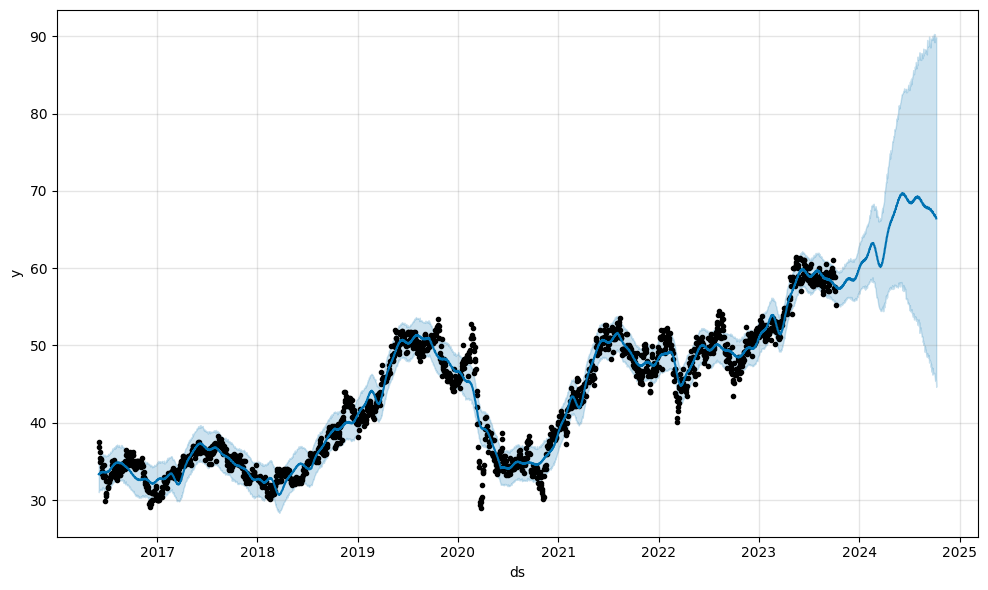

In [ ]:
fig = m.plot(forecast)